## Task 2: To Explore Supervised Machine Learning (Linear Regression)
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### IMPORTING DATA



In [255]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)

In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [84]:
data.keys()

Index(['Hours', 'Scores'], dtype='object')

In [85]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### CHECKING FOR NULL VALUES

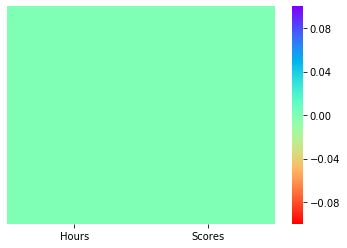

In [86]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = True, cmap="rainbow_r")

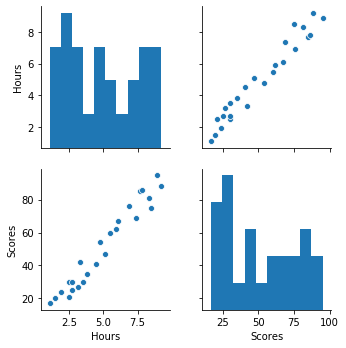

In [87]:
sns.pairplot(data)

#### PLOTTING THE DESTRIBUTION OF SCORES

Text(0.5, 1.0, 'Hours vs. Percentage')

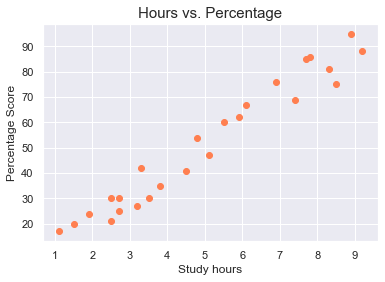

In [235]:
plt.scatter(x='Hours',y='Scores',data=data,c='coral')
plt.xlabel('Study hours')  
plt.ylabel('Percentage Score')  
plt.title('Hours vs. Percentage', fontsize = 15) 

In [236]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values

In [237]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [238]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [239]:
X.shape

(25, 1)

In [240]:
y.shape

(25,)

#### TRAINING THE MODEL AND MAKING PREDICTIONS ON TEST DATA

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [243]:
print('The shape of X_train:', X_train.shape)
print('The shape of X_test:', X_test.shape)
print('The shape of y_train:', y_train.shape)
print('The shape of y_test:', y_test.shape)

The shape of X_train: (18, 1)
The shape of X_test: (7, 1)
The shape of y_train: (18,)
The shape of y_test: (7,)


In [244]:
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [245]:
print(reg.intercept_)

3.014425438315506


In [246]:
print(reg.coef_)

[9.68960215]


In [247]:
y_pred = reg.predict(X_test)
print(y_pred)

[85.37604374 77.62436201 46.61763513 29.17635125 60.18307814 89.2518846
 27.23843082]


#### EVALUATING THE MODEL

In [248]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [249]:
print('Score:', reg.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.9440477504271159
Mean Absolute Error: 5.4103249346378295
Root Mean Squared Error: 6.035967830469107


#### COMPARING THE ACTUAL AND PREDICTED VALUE

In [250]:
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})  
df

,Actual Values,Predicted Values
0,75,85.376044
1,85,77.624362
2,41,46.617635
3,25,29.176351
4,62,60.183078
5,95,89.251885
6,30,27.238431


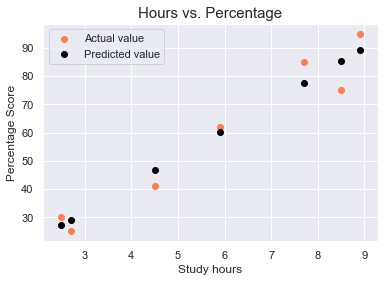

In [251]:
plt.scatter(X_test,y_test,c='coral',label='Actual value')
plt.scatter(X_test,y_pred,c='black',label='Predicted value')
plt.xlabel('Study hours')  
plt.ylabel('Percentage Score')  
plt.title('Hours vs. Percentage', fontsize = 15) 
plt.legend()

Text(0, 0.5, 'Percentage Score')

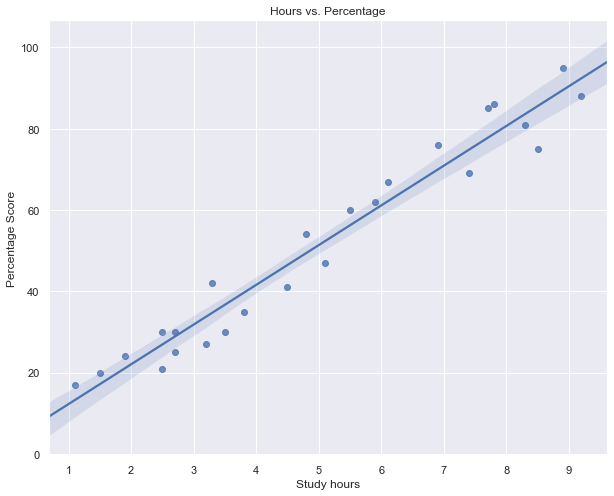

In [254]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10, 8))
sns.regplot(x = 'Hours', y = 'Scores', data = data, color = 'b')
plt.title('Hours vs. Percentage')
plt.xlabel('Study hours')  
plt.ylabel('Percentage Score')

### TESTING THE MODEL WITH OUR OWN DATA (HOURS =9)

In [261]:
hours = 9
pred = reg.predict([[hours]])
print("No of Hours =",hours)
print("Predicted Score =",pred[0])

No of Hours = 9
Predicted Score = 90.22084481175392


#### WE PREDICTED THAT WHEN THE NUMBER OF HOURS STUDIED WAS 9,THE THE SCORE OBTAINED WAS APPROXIMATELY 90.